In [1]:
#Import Dependencies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#file locations

cityfile = ("Resources/city_data.csv")
ridefile = ("Resources/ride_data.csv")


In [3]:
#check csv import of city file

bad_city_df = pd.read_csv(cityfile)
bad_city_df.head()


,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
city_df = pd.DataFrame({'type': bad_city_df.groupby('city').first()['type'],
                                'driver_count': bad_city_df.groupby('city').sum()['driver_count']}).reset_index()
city_df

,city,driver_count,type
0,Alvarezhaven,21,Urban
1,Alyssaberg,67,Urban
2,Anitamouth,16,Suburban
3,Antoniomouth,21,Urban
4,Aprilchester,49,Urban
5,Arnoldview,41,Urban
6,Campbellport,26,Suburban
7,Carrollbury,4,Suburban
8,Carrollfort,55,Urban
9,Clarkstad,21,Suburban


In [5]:
#check csv import of ride file

ride_df = pd.read_csv(ridefile)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
#Merge dataframes
cityandride_df = pd.merge(city_df, ride_df, on="city")
cityandride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Alvarezhaven,21,Urban,2016-04-18 20:51:29,31.93,4267015736324
1,Alvarezhaven,21,Urban,2016-08-01 00:39:48,6.42,8394540350728
2,Alvarezhaven,21,Urban,2016-09-01 22:57:12,18.09,1197329964911
3,Alvarezhaven,21,Urban,2016-08-18 07:12:06,20.74,357421158941
4,Alvarezhaven,21,Urban,2016-04-04 23:45:50,14.25,6431434271355


In [7]:
#Average Fare ($) Per City

avg_fare_city = cityandride_df.groupby('city')
avg_fare_city = avg_fare_city.mean()
avg_fare_city.head()

#this also gives me the driver count by city (driver_count column)


,driver_count,fare,ride_id
city,,,
Alvarezhaven,21.0,23.928710,5.351586e+12
Alyssaberg,67.0,20.609615,3.536678e+12
Anitamouth,16.0,37.315556,4.195870e+12
Antoniomouth,21.0,23.625000,5.086800e+12
Aprilchester,49.0,21.981579,4.574788e+12


In [8]:
#drop the ride_id column to clean data frame

avg_fare_city = avg_fare_city[["driver_count","fare"]]
avg_fare_city.head()

,driver_count,fare
city,,
Alvarezhaven,21.0,23.928710
Alyssaberg,67.0,20.609615
Anitamouth,16.0,37.315556
Antoniomouth,21.0,23.625000
Aprilchester,49.0,21.981579


In [9]:
#Rename columns to clean data frame

avg_fare_city = avg_fare_city.rename(columns={'driver_count':'Driver Count','fare':'Avg Fare Per City'})
avg_fare_city.head()

,Driver Count,Avg Fare Per City
city,,
Alvarezhaven,21.0,23.928710
Alyssaberg,67.0,20.609615
Anitamouth,16.0,37.315556
Antoniomouth,21.0,23.625000
Aprilchester,49.0,21.981579


In [10]:
#Total Number of Rides Per City

total_rides_city = cityandride_df.groupby('city')
total_rides_city=total_rides_city.count()
total_rides_city.head()


,driver_count,type,date,fare,ride_id
city,,,,,
Alvarezhaven,31,31,31,31,31
Alyssaberg,26,26,26,26,26
Anitamouth,9,9,9,9,9
Antoniomouth,22,22,22,22,22
Aprilchester,19,19,19,19,19


In [11]:
#Merge avg fare per city/driver count/rides per city

cityandride_df2 = pd.merge(avg_fare_city, total_rides_city, left_index=True, right_index=True)
cityandride_df2.head()

,Driver Count,Avg Fare Per City,driver_count,type,date,fare,ride_id
city,,,,,,,
Alvarezhaven,21.0,23.928710,31,31,31,31,31
Alyssaberg,67.0,20.609615,26,26,26,26,26
Anitamouth,16.0,37.315556,9,9,9,9,9
Antoniomouth,21.0,23.625000,22,22,22,22,22
Aprilchester,49.0,21.981579,19,19,19,19,19


In [12]:
#Clean dataframe (drop extraneous columns and rename "driver_count" to "Ride Count")

cityandride_df2 = cityandride_df2[["Driver Count","Avg Fare Per City","driver_count"]]
cityandride_df2.head()

,Driver Count,Avg Fare Per City,driver_count
city,,,
Alvarezhaven,21.0,23.928710,31
Alyssaberg,67.0,20.609615,26
Anitamouth,16.0,37.315556,9
Antoniomouth,21.0,23.625000,22
Aprilchester,49.0,21.981579,19


In [13]:
cityandride_df2 = cityandride_df2.rename(columns={'driver_count':'Ride Count'})
cityandride_df2.head()

,Driver Count,Avg Fare Per City,Ride Count
city,,,
Alvarezhaven,21.0,23.928710,31
Alyssaberg,67.0,20.609615,26
Anitamouth,16.0,37.315556,9
Antoniomouth,21.0,23.625000,22
Aprilchester,49.0,21.981579,19


In [14]:
#reset index of cityandride_df2 to get it ready for merging

cityandride_df2 = cityandride_df2.reset_index()
cityandride_df2.head()

,city,Driver Count,Avg Fare Per City,Ride Count
0,Alvarezhaven,21.0,23.928710,31
1,Alyssaberg,67.0,20.609615,26
2,Anitamouth,16.0,37.315556,9
3,Antoniomouth,21.0,23.625000,22
4,Aprilchester,49.0,21.981579,19


In [15]:
#merge original dataframe with cityandride_df2,

cityandride_df3 = pd.merge(cityandride_df2,city_df, on='city')
cityandride_df3.head()

,city,Driver Count,Avg Fare Per City,Ride Count,driver_count,type
0,Alvarezhaven,21.0,23.928710,31,21,Urban
1,Alyssaberg,67.0,20.609615,26,67,Urban
2,Anitamouth,16.0,37.315556,9,16,Suburban
3,Antoniomouth,21.0,23.625000,22,21,Urban
4,Aprilchester,49.0,21.981579,19,49,Urban


In [16]:
#drop unncessary columns and clean the dataframe
cityandride_df3 = cityandride_df3[["city","Driver Count","Avg Fare Per City","Ride Count","type"]]
cityandride_df3


,city,Driver Count,Avg Fare Per City,Ride Count,type
0,Alvarezhaven,21.0,23.928710,31,Urban
1,Alyssaberg,67.0,20.609615,26,Urban
2,Anitamouth,16.0,37.315556,9,Suburban
3,Antoniomouth,21.0,23.625000,22,Urban
4,Aprilchester,49.0,21.981579,19,Urban
5,Arnoldview,41.0,25.106452,31,Urban
6,Campbellport,26.0,33.711333,15,Suburban
7,Carrollbury,4.0,36.606000,10,Suburban
8,Carrollfort,55.0,25.395517,29,Urban
9,Clarkstad,21.0,31.051667,12,Suburban


In [17]:
urban = cityandride_df3.loc[(cityandride_df3["type"] == "Urban")]
urban = urban.set_index("type")
urban.head()

,city,Driver Count,Avg Fare Per City,Ride Count
type,,,,
Urban,Alvarezhaven,21.0,23.928710,31
Urban,Alyssaberg,67.0,20.609615,26
Urban,Antoniomouth,21.0,23.625000,22
Urban,Aprilchester,49.0,21.981579,19
Urban,Arnoldview,41.0,25.106452,31


In [18]:
suburban = cityandride_df3.loc[(cityandride_df3["type"] == "Suburban")]
suburban = suburban.set_index("type")
suburban.head()

,city,Driver Count,Avg Fare Per City,Ride Count
type,,,,
Suburban,Anitamouth,16.0,37.315556,9
Suburban,Campbellport,26.0,33.711333,15
Suburban,Carrollbury,4.0,36.606000,10
Suburban,Clarkstad,21.0,31.051667,12
Suburban,Conwaymouth,18.0,34.591818,11


In [19]:
rural = cityandride_df3.loc[(cityandride_df3["type"] == "Rural")]
rural = rural.set_index("type")
rural.head()

,city,Driver Count,Avg Fare Per City,Ride Count
type,,,,
Rural,East Leslie,9.0,33.660909,11
Rural,East Stephen,6.0,39.053000,10
Rural,East Troybury,3.0,33.244286,7
Rural,Erikport,3.0,30.043750,8
Rural,Hernandezshire,10.0,32.002222,9


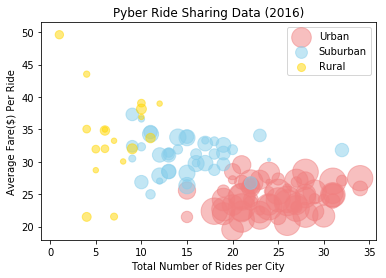

In [20]:
x_urban = urban["Ride Count"]
y_urban = urban["Avg Fare Per City"]
z_urban = urban["Driver Count"]

x_suburban = suburban["Ride Count"]
y_suburban = suburban["Avg Fare Per City"]
z_suburban = suburban["Driver Count"]

x_rural = rural["Ride Count"]
y_rural = rural["Avg Fare Per City"]
z_rural = rural["Driver Count"]

plt.scatter(x_urban,y_urban,s =z_urban*10, facecolors="lightcoral",alpha=0.5, label="Urban")
plt.scatter(x_suburban,y_suburban,s =z_suburban*10, facecolors="skyblue",alpha=0.5, label = "Suburban")
plt.scatter(x_rural,y_rural,s =z_rural*10, facecolors="gold",alpha=0.5, label = "Rural")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare($) Per Ride")

plt.legend()

In [21]:
#% of Total Fares by City Type 
total_fare = cityandride_df['fare'].sum()
print(total_fare)

total_fare_city = cityandride_df.groupby('type')
total_fare_city = total_fare_city.sum()
total_fare_city.head()

63651.31


,driver_count,fare,ride_id
type,,,
Rural,727,4255.09,658729360193746
Suburban,9730,19317.88,3006404300903080
Urban,64501,40078.34,7890194186030600


In [22]:
#get fare

rural_fare = total_fare_city.loc["Rural",['fare']]
print(rural_fare)

suburban_fare = total_fare_city.loc["Suburban",['fare']]
print(suburban_fare)

urban_fare = total_fare_city.loc["Urban",['fare']]
print(urban_fare)


fare    4255.09
Name: Rural, dtype: float64
fare    19317.88
Name: Suburban, dtype: float64
fare    40078.34
Name: Urban, dtype: float64


(-1.114889486848913,
 1.1521392152822503,
 -1.1096999573600084,
 1.1370352194436004)

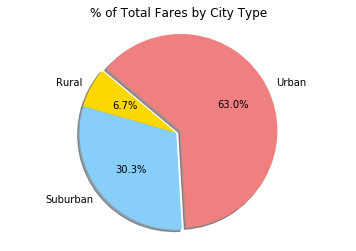

In [23]:
city_types = ["Rural","Suburban","Urban"]
fares_by_city = [rural_fare, suburban_fare, urban_fare]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.05)

plt.pie(fares_by_city, explode = explode, labels = city_types, colors = colors,autopct ="%1.1f%%", shadow=True, startangle = 140)

plt.title("% of Total Fares by City Type")

plt.axis("equal")

In [24]:
#% Total Rides by City Type 

total_ride_city = cityandride_df3.groupby('type')
total_ride_city = total_ride_city.sum()
total_ride_city

,Driver Count,Avg Fare Per City,Ride Count
type,,,
Rural,104.0,615.728572,125
Suburban,638.0,1268.627391,625
Urban,2607.0,1623.863390,1625


In [25]:
rural_rides = total_ride_city.loc["Rural",['Ride Count']]
print(rural_rides)

suburban_rides = total_ride_city.loc["Suburban",['Ride Count']]
print(suburban_rides)

urban_rides = total_ride_city.loc["Urban",['Ride Count']]
print(urban_rides)

Ride Count    125.0
Name: Rural, dtype: float64
Ride Count    625.0
Name: Suburban, dtype: float64
Ride Count    1625.0
Name: Urban, dtype: float64


(-1.10864919803973, 1.165160676153056, -1.1002690397424333, 1.1317604340391525)

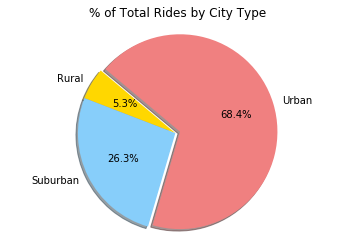

In [26]:
city_types = ["Rural","Suburban","Urban"]
rides_by_city = [rural_rides, suburban_rides, urban_rides]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.05)

plt.pie(rides_by_city, explode = explode, labels = city_types, colors = colors,autopct ="%1.1f%%", shadow=True, startangle = 140)

plt.title("% of Total Rides by City Type")

plt.axis("equal")

In [27]:
#% of Total Drivers by City Type 

rural_driver = total_ride_city.loc["Rural",['Driver Count']]
print(rural_driver)

suburban_driver = total_ride_city.loc["Suburban",['Driver Count']]
print(suburban_driver)

urban_driver = total_ride_city.loc["Urban",['Driver Count']]
print(urban_driver)

Driver Count    104.0
Name: Rural, dtype: float64
Driver Count    638.0
Name: Suburban, dtype: float64
Driver Count    2607.0
Name: Urban, dtype: float64


(-1.1178452044052383,
 1.1534514085225787,
 -1.1037445218600326,
 1.103784975286574)

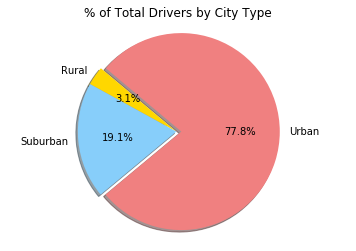

In [28]:
city_types = ["Rural","Suburban","Urban"]
drivers_by_city = [rural_driver, suburban_driver, urban_driver]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.05)

plt.pie(drivers_by_city, explode = explode, labels = city_types, colors = colors,autopct ="%1.1f%%", shadow=True, startangle = 140)

plt.title("% of Total Drivers by City Type")

plt.axis("equal")

In [ ]:
#Analysis

#Observed Trend 1: Urban cities had the greatest number or rides and drivers

#Observed Trend 2: The average fare per ride for urban cities was lower than for suburban or rural cities

#Observed Trend 3: The highest average fare per ride was in a rural city